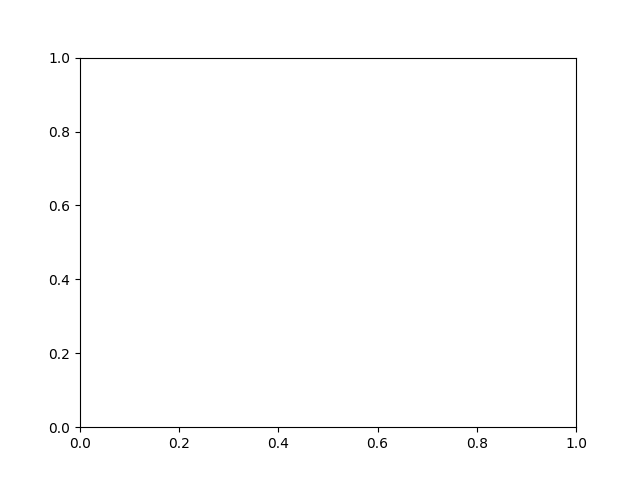

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks

%matplotlib widget

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100  

fig = plt.figure()
ax = fig.gca()

In [4]:
from typing import List


def importFile(datePrefix:str, filepath:str) -> List[pd.DataFrame]:
    frames = []

    for i in range(1, 500, 1):
        filename = f'{filepath}/{datePrefix}_{i:03n}.csv'
        frame = pd.read_csv(filename, header=0, skiprows=[1], dtype={"时间": np.float64, "通道 B": np.float64})
        frame.rename(columns={"时间": "time", "通道 B": "voltage"}, inplace=True)
        frame.drop(columns=["通道 A"], inplace=True)
        frame = frame[frame["time"] > 1]
        frame = frame[frame["time"] < 5]
        frames.append(frame)
    
    return frames


In [13]:
datePrefix = "20240612-0001"
filepath = f"data/20260612_baseline/sit2_com/{datePrefix}"

frames = importFile(datePrefix=datePrefix, filepath=filepath)
time = np.asarray([frames[i].time for i in range(499)])

baselineFrames = importFile(filepath="data/20260612_baseline/ref_com_1/baseline/", datePrefix="20240612-0001")
controlVoltage = np.asarray([frames[i].voltage - baselineFrames[i].voltage for i in range(499)])

peaksFrame = np.asarray([np.asarray(find_peaks(controlVoltage[i], distance=15)[0]) for i in range(499)])


/var/folders/25/zpkgzz496b39mh7j2mgg_mbc0000gn/T/ipykernel_73189/1819661584.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaksFrame = np.asarray([np.asarray(find_peaks(controlVoltage[i], distance=15)[0]) for i in range(499)])


In [ ]:
ax.clear()

line, = ax.plot(frames[0].time, frames[0].voltage)

def animate(i):
    line.set_ydata(frames[i].voltage)
    return line,

anim = FuncAnimation(fig, animate, frames=range(1, 499, 10), blit=True)
plt.show()

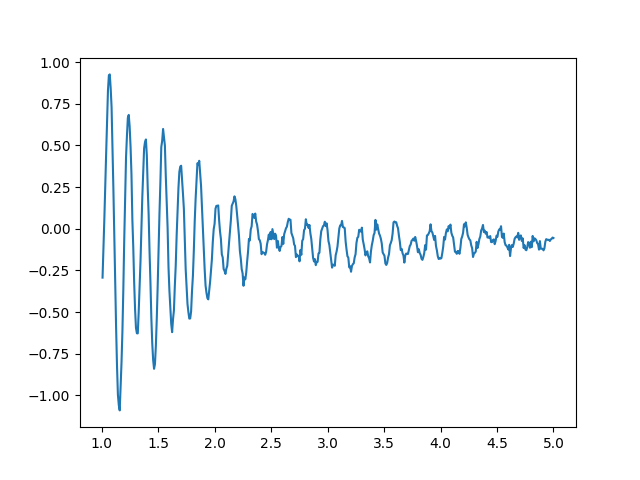

In [29]:
ax.clear()
line, = ax.plot(frames[0].time, controlVoltage[0])

def animate(i):
    line.set_ydata(controlVoltage[i])
    return line,
    
anim = FuncAnimation(fig, animate, frames=range(1, 499, 10), blit=True)
plt.show()



In [ ]:

ax.clear()
line, = ax.plot(time[0], controlVoltage[0])


def animate(i):
    ax.clear()
    ax.set_ylim([-2, 2])
    ax.plot(time[i], controlVoltage[i])
    ax.plot(time[i][peaksFrame[i]], controlVoltage[i][peaksFrame[i]], "rx")
    return line,

    
anim = FuncAnimation(fig, animate, frames=range(1, 499, 10), blit=True)
    


[-0.62399999, -0.6239999900000002, -0.6159999899999999, -0.61599998, -0.62399998, -0.61599998, -0.61599998, -0.62399999, -0.62399999, -0.62399998, -0.62399998, -0.62399998, -0.61599998, -0.62399999, -0.61599998, -0.6159999900000002, -0.62399998, -0.63199999, -0.61599998, -0.62399998, -0.62399999, -0.6239999900000002, -0.62399998, -0.61599998, -0.62399998, -0.61599998, -0.62399998, -0.62399998, -0.62399998, -0.6159999899999999, -0.6239999900000002, -0.62399999, -0.62399998, -0.63199999, -0.61599998, -0.62399998, -0.62399998, -0.62399998, -0.60799998, -0.62399998, -0.62399998, -0.62399998, -0.62399999, -0.61599998, -0.62399998, -0.61599998, -0.62399998, -0.6239999799999998, -0.62399998, -0.62399998, -0.62399998, -0.62399998, -0.61599998, -0.63199998, -0.62399998, -0.61599998, -0.6159999899999999, -0.61599998, -0.62399998, -0.62399999, -0.61599998, -0.62399998, -0.62399998, -0.61599998, -0.63199998, -0.6159999899999999, -0.62399998, -0.6159999899999999, -0.62399998, -0.6159999899999999, -

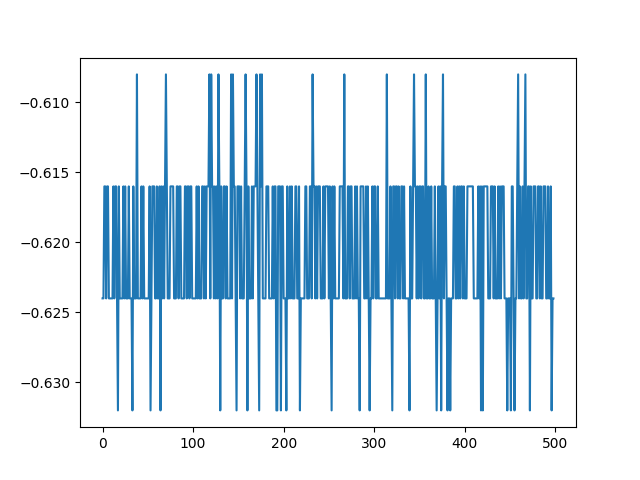

In [28]:
targetPeakPair = (1, 5)

peak1OverTime = [peaksFrame[i][targetPeakPair[0]] for i in range(499)]
peak2OverTime = [peaksFrame[i][targetPeakPair[1]] for i in range(499)]

timeDiff = [time[i, peak1OverTime[i]] - time[i, peak2OverTime[i]] for i in range(499)]


plt.cla()
plt.plot(timeDiff)
plt.show()
